In [94]:
import pandas as pd
import statistics
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold ,RepeatedKFold,train_test_split
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats import shapiro,pearsonr
from scipy import stats
from sklearn import preprocessing,metrics,datasets, linear_model

In [95]:
sheets=pd.read_excel('stock portfolio\\sda_data.xlsx',sheet_name=['all period'],skiprows=[0], usecols = [1,2,3,4,5,6,7,8,9,10,11,12])
df=pd.concat(sheets[frame] for frame in sheets.keys())
df.keys()

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return', 'Excess Return',
       'Systematic Risk', 'Total Risk', 'Abs. Win Rate', 'Rel. Win Rate'],
      dtype='object')

In [96]:
df.isnull().values.any()

False

In [97]:
attri=[" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"]
sample_mean,sample_median,sample_mode,sample_variance,quantile_25,quantile_75,X=[],[],[],[],[],[],[]
for x in attri:
    X.append(df[x])
    sample_mean.append(statistics.mean(df[x]))
    sample_median.append(statistics.median(df[x]))
    sample_mode.append(statistics.mode(df[x]))
    sample_variance.append(np.var(df[x],ddof=1))
    quantile_25.append(np.quantile(df[x], .25))
    quantile_75.append(np.quantile(df[x], .75))
print(sample_mean)
print(sample_median)
print(sample_mode)
print(sample_variance)
print(quantile_25)
print(quantile_75)

[0.1666190476190476, 0.1666190476190476, 0.1666190476190476, 0.1666190476190476, 0.1666190476190476, 0.1666190476190476]
[0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.03972223963133642, 0.03972223963133642, 0.03972223963133642, 0.03972223963133642, 0.03972223963133642, 0.03972223963133642]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.2915, 0.2915, 0.2915, 0.2915, 0.2915, 0.2915]


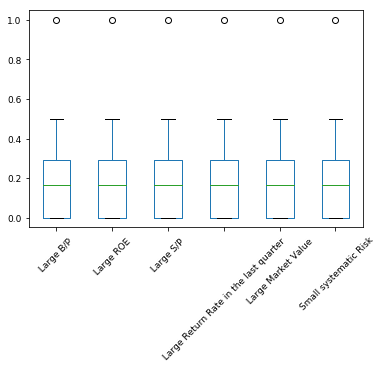

In [98]:
boxplot = df.boxplot(column=[' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk'],grid=False, rot=45, fontsize=9)

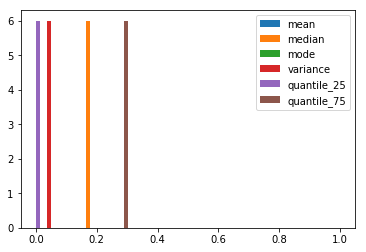

In [99]:
bins = np.linspace(0,1 , 80)
plt.hist(sample_mean, bins, alpha=1, label='mean')
plt.hist(sample_median, bins, alpha=1, label='median')
plt.hist(sample_mode, bins, alpha=1, label='mode')
plt.hist(sample_variance, bins, alpha=1, label='variance')
plt.hist(quantile_25, bins, alpha=1, label='quantile_25')
plt.hist(quantile_75, bins, alpha=1, label='quantile_75')
plt.legend(loc='upper right')
plt.show()

In [100]:
X=np.transpose(X)
Xnew=[]
X_df=df.drop(['Annual Return', 'Excess Return',
       'Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'],axis=1)
onesvec=[]
for i in range(63):
    onesvec.append([1])
# print(onesvec)
# print(len(onesvec),len(sample_mean),len(X))
z=np.dot(onesvec,[sample_mean])
Xnew=np.subtract(X,z)
# print(Xnew)
covariance=(1/(62))*(np.dot(np.transpose(Xnew),Xnew))
print(covariance)
# print(np.diag(np.diag(covariance)))
correlation=np.dot(np.dot(((1/0.03972224)*np.sqrt(np.diag(np.diag(covariance)))),covariance),((1/0.03972224)*np.sqrt(np.diag(np.diag(covariance)))))
print(correlation)
#print(X)
#covariance=np.cov(X)
# correlation=X.corr()
# print(covariance)
# print(correlation)

[[ 0.03972224 -0.00794444 -0.00794444 -0.00794444 -0.00794444 -0.00794444]
 [-0.00794444  0.03972224 -0.00794444 -0.00794444 -0.00794444 -0.00794444]
 [-0.00794444 -0.00794444  0.03972224 -0.00794444 -0.00794444 -0.00794444]
 [-0.00794444 -0.00794444 -0.00794444  0.03972224 -0.00794444 -0.00794444]
 [-0.00794444 -0.00794444 -0.00794444 -0.00794444  0.03972224 -0.00794444]
 [-0.00794444 -0.00794444 -0.00794444 -0.00794444 -0.00794444  0.03972224]]
[[ 0.99999998 -0.19999974 -0.19999974 -0.19999974 -0.19999974 -0.19999974]
 [-0.19999974  0.99999998 -0.19999974 -0.19999974 -0.19999974 -0.19999974]
 [-0.19999974 -0.19999974  0.99999998 -0.19999974 -0.19999974 -0.19999974]
 [-0.19999974 -0.19999974 -0.19999974  0.99999998 -0.19999974 -0.19999974]
 [-0.19999974 -0.19999974 -0.19999974 -0.19999974  0.99999998 -0.19999974]
 [-0.19999974 -0.19999974 -0.19999974 -0.19999974 -0.19999974  0.99999998]]


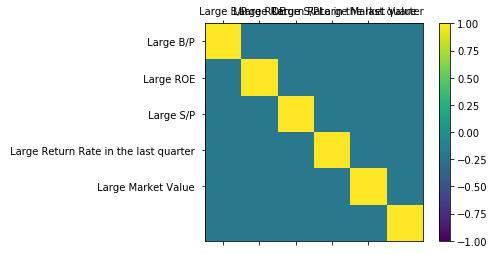

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(attri)
ax.set_yticklabels(attri)
plt.show()

In [102]:
z = np.abs(stats.zscore(df))
# print(z)
# print(np.where(z > 3))
df_o = df[(z < 3).all(axis=1)]
print(df_o.shape)

(56, 12)


In [103]:
y = df.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"],axis=1)
x=df.drop(['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'],axis=1)
y_o = df_o.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"],axis=1)
x_o=df_o.drop(['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'],axis=1)

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
x_o_train, x_o_test, y_o_train, y_o_test = train_test_split(x_o, y_o,test_size=0.2)
# rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=2652124)
# for train_index, test_index in rkf.split(x):
#     print("Train:", train_index, "Validation:",test_index)
#     x_train, x_test = x[train_index], y[test_index] 
#     y_train, y_test = y[train_index], y[test_index]
# print("\nX_train:\n")
# print(x_train.head())
# print(x_train.shape)

# print("\nX_test:\n")
# print(x_test.head())
# print(x_test.shape)



model for Annual Return evaluation parameter
The linear model is: Y = -2.6648 + 2.8266*large b/p + 2.8503*large ROE + 2.8624*large s/p+ 2.784*large return rates+ 2.77*large market sales+ 2.7958*small system risk
Variance score: 0.6312310120357022


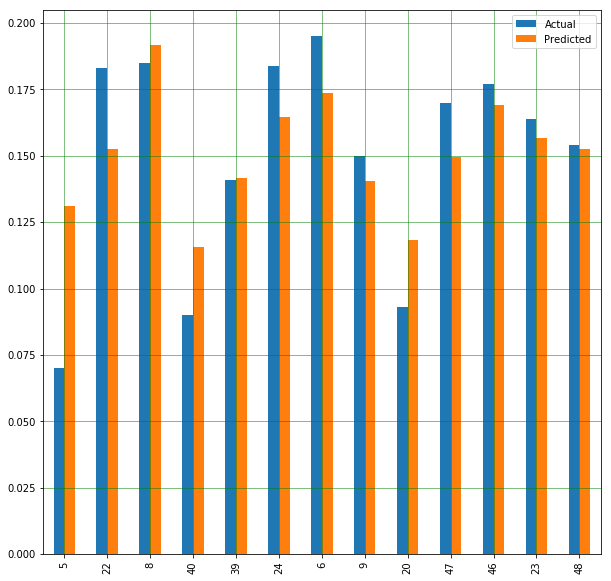

Mean Absolute Error: 0.0182397163565333
Mean Squared Error: 0.0005719672465276785
Root Mean Squared Error: 0.023915836730661933


model for Excess Return evaluation parameter
The linear model is: Y = -0.66854 + 0.68614*large b/p + 0.69084*large ROE + 0.69292*large s/p+ 0.67366*large return rates+ 0.67316*large market sales+ 0.68433*small system risk
Variance score: 0.3468089818032233


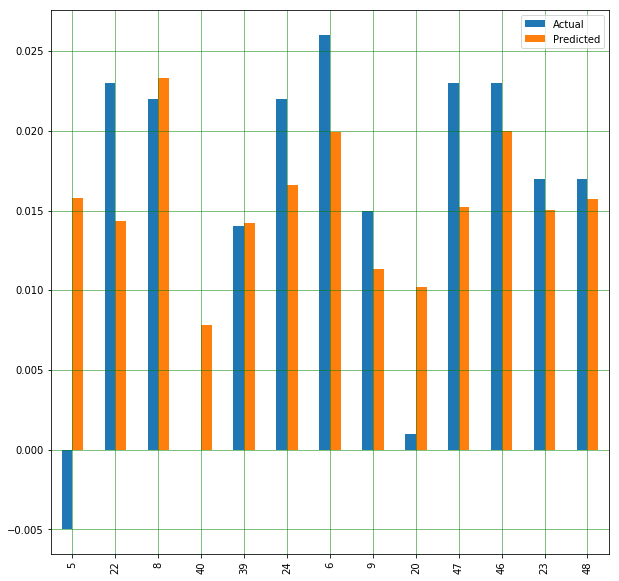

Mean Absolute Error: 0.005943151534323256
Mean Squared Error: 6.231983418582737e-05
Root Mean Squared Error: 0.007894291240246168


model for Systematic Risk evaluation parameter
The linear model is: Y = 0.38072 + 0.75689*large b/p + 0.63184*large ROE + 0.82777*large s/p+ 0.84247*large return rates+ 0.53181*large market sales+ 0.34802*small system risk
Variance score: -2.9333887008960344


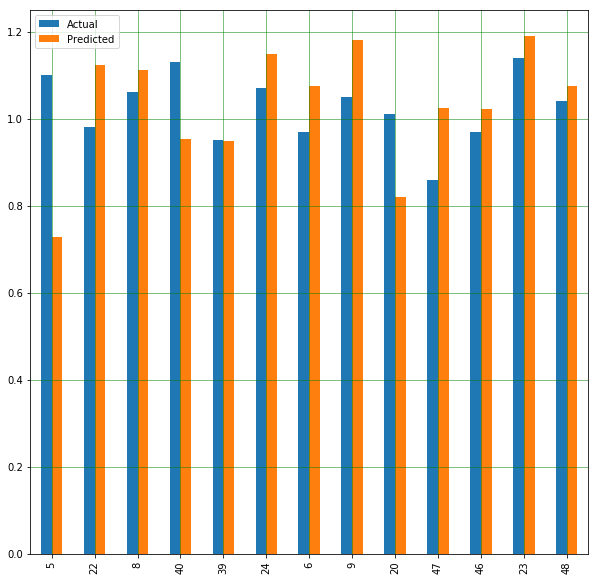

Mean Absolute Error: 0.11883746377475807
Mean Squared Error: 0.022729866303521105
Root Mean Squared Error: 0.15076427396276978


model for Total Risk evaluation parameter
The linear model is: Y = -0.37862 + 0.50976*large b/p + 0.47245*large ROE + 0.51227*large s/p+ 0.50359*large return rates+ 0.45032*large market sales+ 0.46322*small system risk
Variance score: -1.0766444329909186


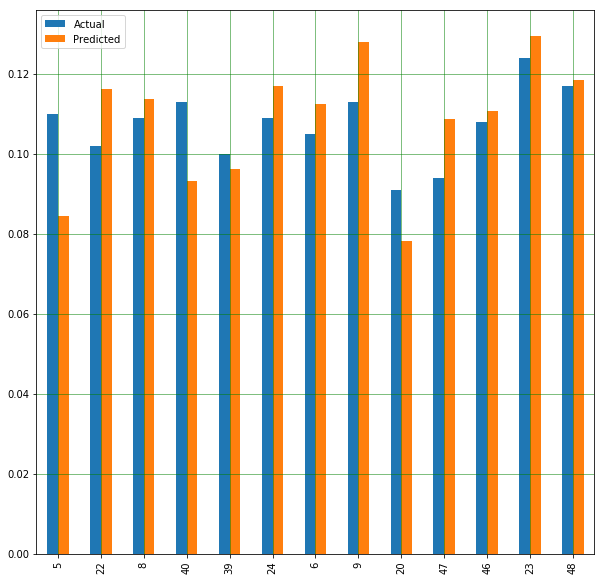

Mean Absolute Error: 0.01043413322044537
Mean Squared Error: 0.00015666992024043918
Root Mean Squared Error: 0.01251678553944419


model for Abs. Win Rate evaluation parameter
The linear model is: Y = -7.8121 + 8.5176*large b/p + 8.5112*large ROE + 8.4751*large s/p+ 8.4499*large return rates+ 8.5276*large market sales+ 8.4775*small system risk
Variance score: 0.06626353740992075


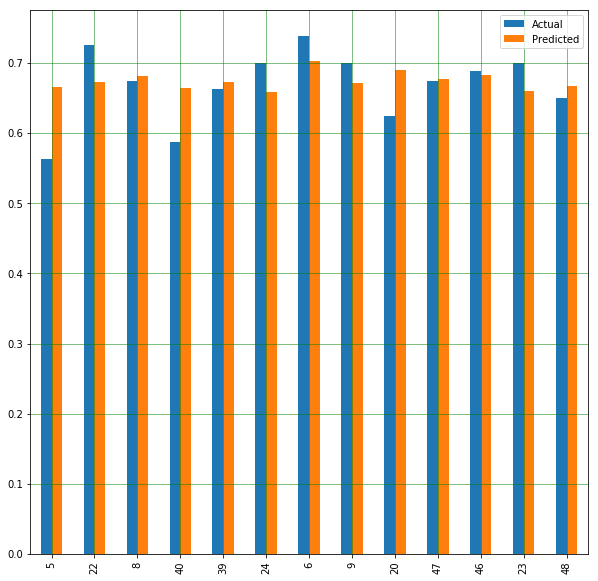

Mean Absolute Error: 0.037151796145476396
Mean Squared Error: 0.0022509678829812085
Root Mean Squared Error: 0.0474443661880018


model for Rel. Win Rate evaluation parameter
The linear model is: Y = -12.666 + 13.216*large b/p + 13.396*large ROE + 13.237*large s/p+ 13.171*large return rates+ 13.261*large market sales+ 13.205*small system risk
Variance score: 0.580156601455514


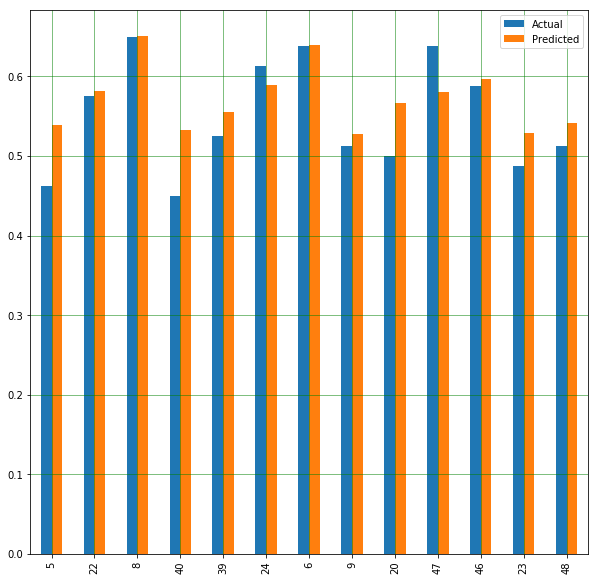

Mean Absolute Error: 0.03374998995831613
Mean Squared Error: 0.0018990088300673996
Root Mean Squared Error: 0.043577618453368924


In [105]:
Y_pred=pd.DataFrame(columns=['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'])
# Y_pred=y_test
error=pd.DataFrame(columns=['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'])
for y in y_train.keys():
    reg = linear_model.LinearRegression() 
    reg.fit(x_train, y_train[y])
    print("\n")
    print("model for",y,'evaluation parameter')
    print("The linear model is: Y = {:.5} + {:.5}*large b/p + {:.5}*large ROE + {:.5}*large s/p+ {:.5}*large return rates+ {:.5}*large market sales+ {:.5}*small system risk".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2],reg.coef_[3],reg.coef_[4],reg.coef_[5]))

#     print('Coefficients: \n', reg.coef_) 
    print('Variance score: {}'.format(reg.score(x_test, y_test[y]))) 
#     plt.style.use('fivethirtyeight') 
#     plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train[y], 
#                 color = "green", s = 10, label = 'Train data') 
#     plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test[y], 
#                 color = "blue", s = 10, label = 'Test data') 
#     plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
#     plt.legend(loc = 'upper right') 
#     plt.title("Residual errors") 
#     plt.show() 
    y_pred = reg.predict(x_test)
    Y_pred[y]= y_pred
    error[y]=np.subtract(y_pred,y_test[y])
    df_pred = pd.DataFrame({'Actual': y_test[y], 'Predicted': y_pred})
#     print(df_pred)
    df_pred.plot(kind='bar',figsize=(10,10))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test[y], y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test[y], y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test[y], y_pred)))
#     print('accuracy:',100*(1-(metrics.mean_squared_error(y_test[y], y_pred))))
#     reg.conf_int()
    # print(y_test)
# print(Y_pred)



model for 6 evaluation parameter
The linear model is: Y = -0.011383 + 1.4626*large b/p + 1.7414*large ROE + 1.7161*large s/p+ 1.1456*large return rates+ 0.88624*large market sales+ 1.0554*small system risk
Variance score: 0.7241227037632568


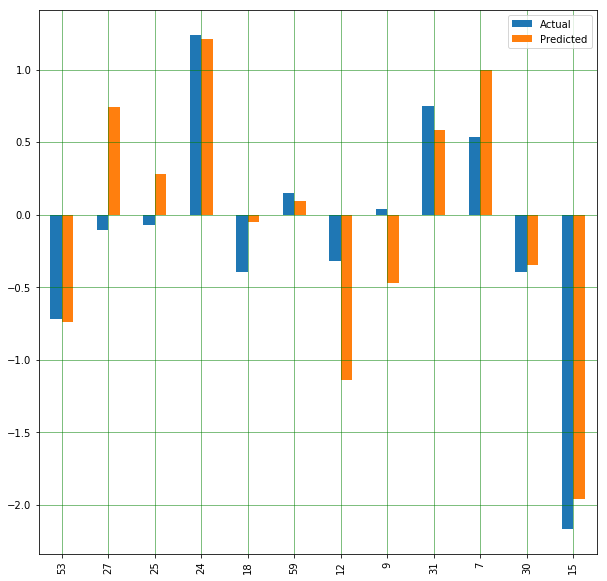

Mean Absolute Error: 0.31967810163980176
Mean Squared Error: 0.18086374157918927
Root Mean Squared Error: 0.42528077969641337


model for 7 evaluation parameter
The linear model is: Y = -0.027119 + 1.7309*large b/p + 1.944*large ROE + 1.8698*large s/p+ 1.33*large return rates+ 1.1102*large market sales+ 1.3973*small system risk
Variance score: 0.7653499161891338


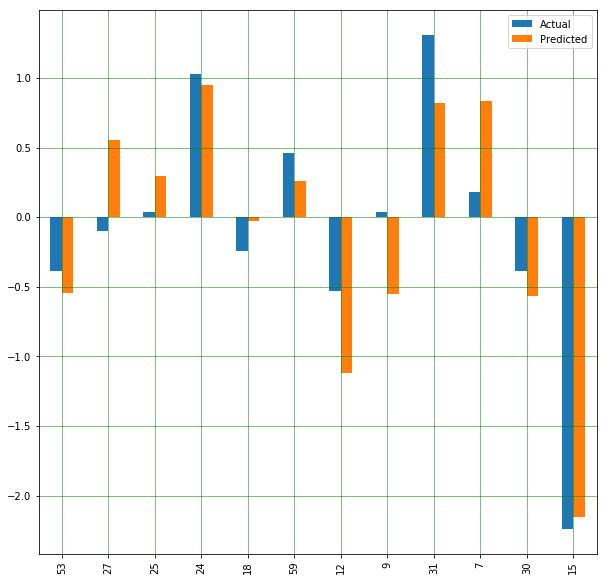

Mean Absolute Error: 0.3474039358462942
Mean Squared Error: 0.16879907099882854
Root Mean Squared Error: 0.41085164110519085


model for 8 evaluation parameter
The linear model is: Y = 0.049347 + -1.6621*large b/p + -1.7406*large ROE + -1.3206*large s/p+ -1.3035*large return rates+ -1.5727*large market sales+ -1.8244*small system risk
Variance score: 0.616295685940541


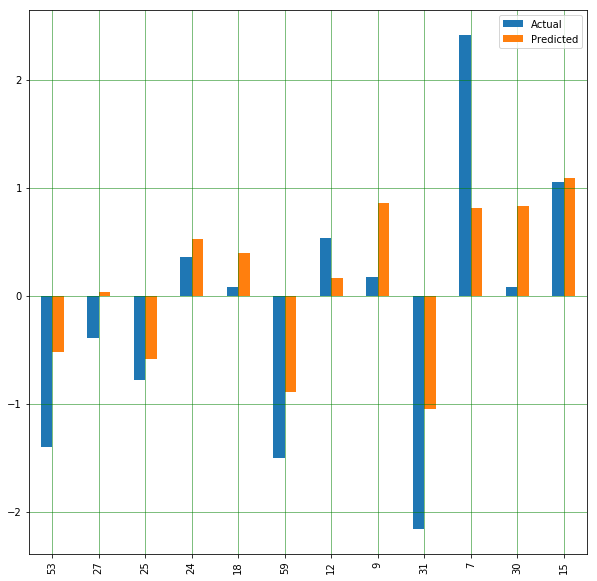

Mean Absolute Error: 0.5960038701212467
Mean Squared Error: 0.5381652158151778
Root Mean Squared Error: 0.7335974480702464


model for 9 evaluation parameter
The linear model is: Y = 0.018566 + -0.95131*large b/p + -1.3296*large ROE + -0.75533*large s/p+ -0.90434*large return rates+ -1.4246*large market sales+ -1.1586*small system risk
Variance score: 0.6958624958358558


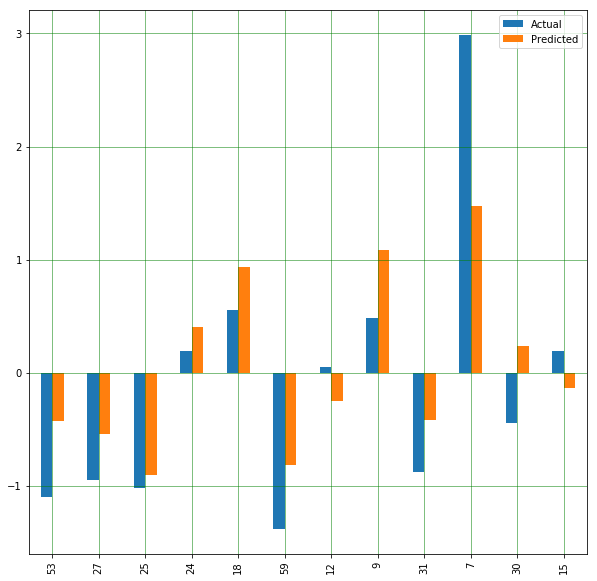

Mean Absolute Error: 0.5218903218613079
Mean Squared Error: 0.38990183216149327
Root Mean Squared Error: 0.6244211977195308


model for 10 evaluation parameter
The linear model is: Y = -0.023599 + 1.1888*large b/p + 1.0751*large ROE + 0.91112*large s/p+ 0.61492*large return rates+ 0.73812*large market sales+ 0.49053*small system risk
Variance score: 0.14880008560246583


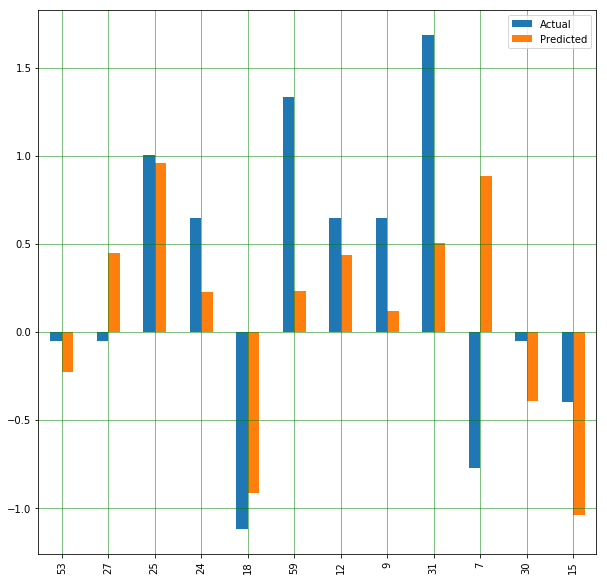

Mean Absolute Error: 0.5840010021857637
Mean Squared Error: 0.5583008856867975
Root Mean Squared Error: 0.7471953464033334


model for 11 evaluation parameter
The linear model is: Y = -0.038868 + 1.0658*large b/p + 1.8637*large ROE + 1.1714*large s/p+ 0.8375*large return rates+ 1.1462*large market sales+ 0.88836*small system risk
Variance score: 0.4704771484456818


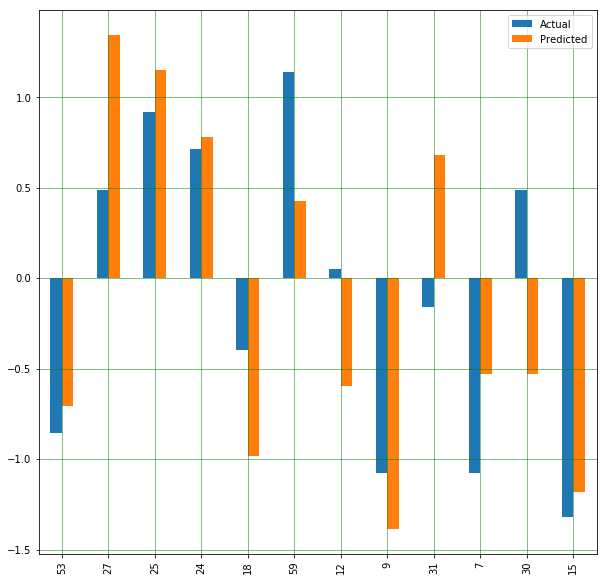

Mean Absolute Error: 0.5085964509878841
Mean Squared Error: 0.35352525773487314
Root Mean Squared Error: 0.5945799002109583


In [117]:
Y_o_pred=pd.DataFrame(columns=['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'])
# Y_pred=y_test
for y in y_o_train.keys():
    reg = linear_model.LinearRegression() 
    reg.fit(x_o_train, y_o_train[y])
    print("\n")
    print("model for",y,'evaluation parameter')
    
    print("The linear model is: Y = {:.5} + {:.5}*large b/p + {:.5}*large ROE + {:.5}*large s/p+ {:.5}*large return rates+ {:.5}*large market sales+ {:.5}*small system risk".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2],reg.coef_[3],reg.coef_[4],reg.coef_[5]))

#     print('Coefficients: \n', reg.coef_) 
    print('Variance score: {}'.format(reg.score(x_o_test, y_o_test[y]))) 
#     plt.style.use('fivethirtyeight') 
#     plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train[y], 
#                 color = "green", s = 10, label = 'Train data') 
#     plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test[y], 
#                 color = "blue", s = 10, label = 'Test data') 
#     plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
#     plt.legend(loc = 'upper right') 
#     plt.title("Residual errors") 
#     plt.show() 
    y_o_pred = reg.predict(x_o_test)
    Y_o_pred[y]= y_o_pred
    df_pred = pd.DataFrame({'Actual': y_o_test[y], 'Predicted': y_o_pred})
#     print(df_pred)
    df_pred.plot(kind='bar',figsize=(10,10))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_o_test[y], y_o_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_o_test[y], y_o_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_o_test[y], y_o_pred)))
#     print('accuracy:',100*(1-(metrics.mean_squared_error(y_o_test[y], y_o_pred))))
    # print(y_test)
# print(Y_pred)

In [107]:

y = df.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk",'Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate'],axis=1)
print(error)
stat, p = shapiro(error)
print(p)
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

    Annual Return  Excess Return  Systematic Risk  Total Risk  Abs. Win Rate  \
5        0.060977       0.020792        -0.371266   -0.025403       0.102367   
22      -0.030299      -0.008680         0.143707    0.014151      -0.052695   
8        0.006554       0.001341         0.050524    0.004737       0.006038   
40       0.025694       0.007830        -0.175756   -0.019715       0.076405   
39       0.000789       0.000245        -0.000651   -0.003827       0.009795   
24      -0.019386      -0.005421         0.077312    0.007987      -0.041854   
6       -0.021334      -0.006052         0.105080    0.007482      -0.035702   
9       -0.009474      -0.003646         0.130398    0.015055      -0.028347   
20       0.025101       0.009204        -0.189368   -0.012851       0.065437   
47      -0.020615      -0.007799         0.165521    0.014634       0.001940   
46      -0.008024      -0.002983         0.051847    0.002802      -0.004762   
23      -0.007276      -0.001989        

In [108]:
df_c=pd.DataFrame(columns=df.keys())
for each in df.keys():
    df_c[each]=[x-(df[each].min(0)-1) for x in df[each]]
df_exp = df_c.apply(np.log) 

In [109]:
X_s = preprocessing.StandardScaler().fit_transform(df_exp)
X_s = pd.DataFrame(X_s)

c:\users\neeharika\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


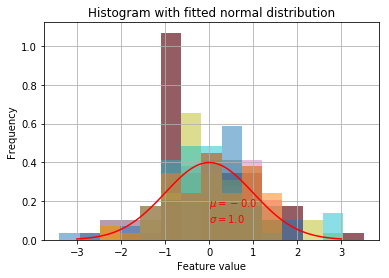

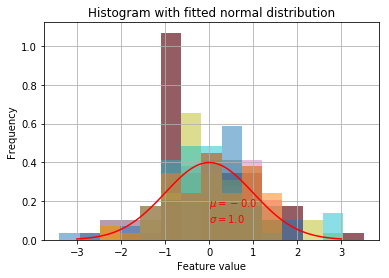

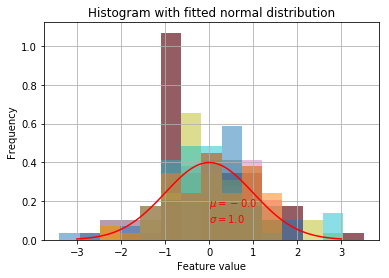

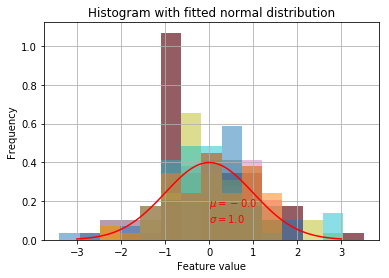

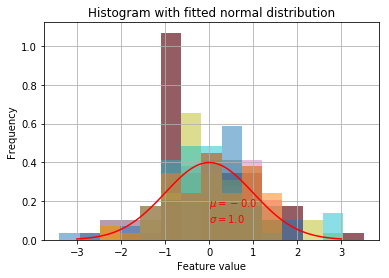

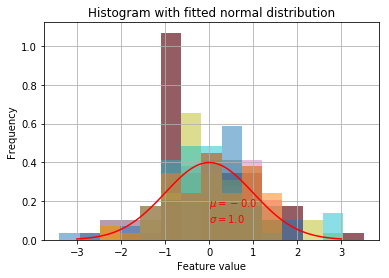

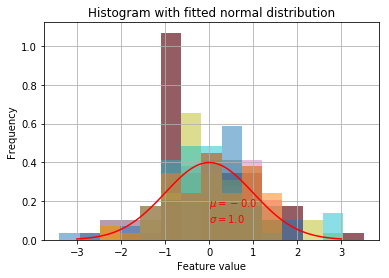

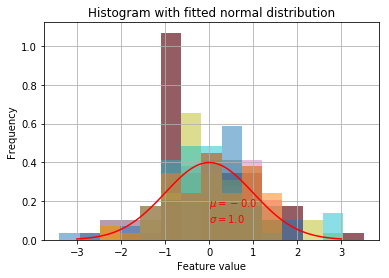

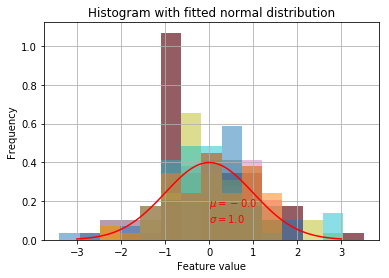

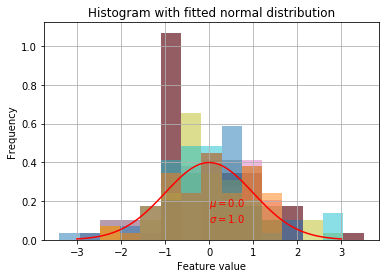

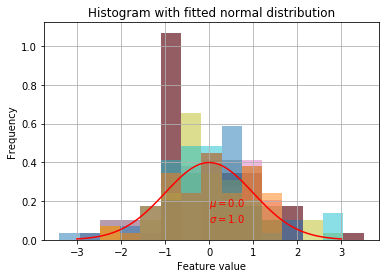

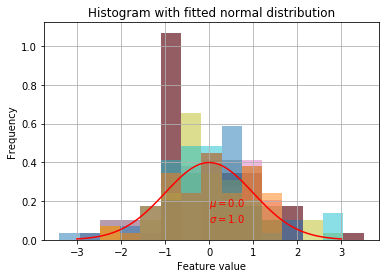

In [110]:
i=0
for each in df.keys():
    param = stats.norm.fit(X_s[i])
    x = np.linspace(-3, 3, 100)
    pdf_fitted = stats.norm.pdf(x, *param)
    X_s.plot.hist(alpha=0.5, bins=15, grid=True, normed=True, legend=None)
    plt.text(x=np.min(df_exp[each]), y=0.1, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1], color='r')
    plt.xlabel("Feature value")
    plt.title("Histogram with fitted normal distribution")
    plt.plot(x, pdf_fitted, color='r')
    plt.show()
    i=i+1

In [111]:
z = np.abs(stats.zscore(X_s))
# print(z)
# print(np.where(z > 3))
X_s_o = X_s[(z < 3).all(axis=1)]
print(X_s_o.shape)

(57, 12)


In [112]:
y = X_s.drop([0,1,2,3,4,5],axis=1)
x=X_s.drop([6,7,8,9,10,11],axis=1)
y_o = X_s_o.drop([0,1,2,3,4,5],axis=1)
x_o=X_s_o.drop([6,7,8,9,10,11],axis=1)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
x_o_train, x_o_test, y_o_train, y_o_test = train_test_split(x_o, y_o,test_size=0.2)



model for 6 evaluation parameter
Variance score: 0.8361891905933202
The linear model is: Y = -0.056039 + 1.5068*large b/p + 1.7081*large ROE + 1.7151*large s/p+ 1.1789*large return rates+ 0.90308*large market sales+ 1.0449*small system risk


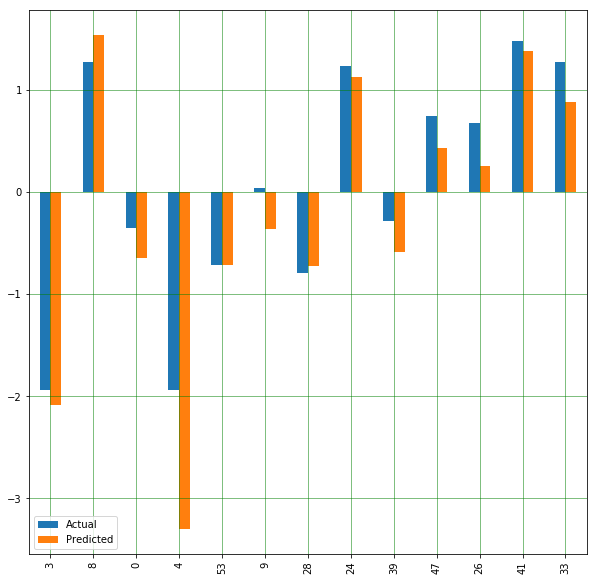

Mean Absolute Error: 0.32320318439511164
Mean Squared Error: 0.21199368368460478
Root Mean Squared Error: 0.46042771819755246


model for 7 evaluation parameter
Variance score: 0.7889330621883308
The linear model is: Y = -0.064848 + 1.8024*large b/p + 1.9565*large ROE + 1.933*large s/p+ 1.4007*large return rates+ 1.1773*large market sales+ 1.4241*small system risk


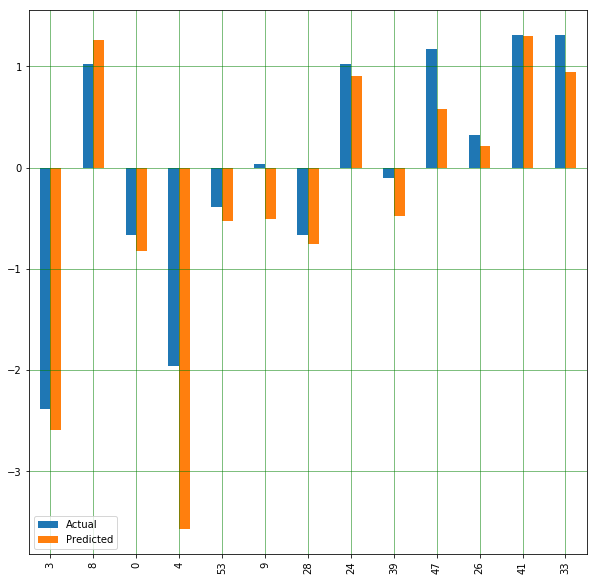

Mean Absolute Error: 0.35036497205040573
Mean Squared Error: 0.28527922375611187
Root Mean Squared Error: 0.5341153655869787


model for 8 evaluation parameter
Variance score: 0.6388477627885503
The linear model is: Y = 0.062647 + -1.7829*large b/p + -1.9348*large ROE + -1.5263*large s/p+ -1.4656*large return rates+ -1.7829*large market sales+ -2.0186*small system risk


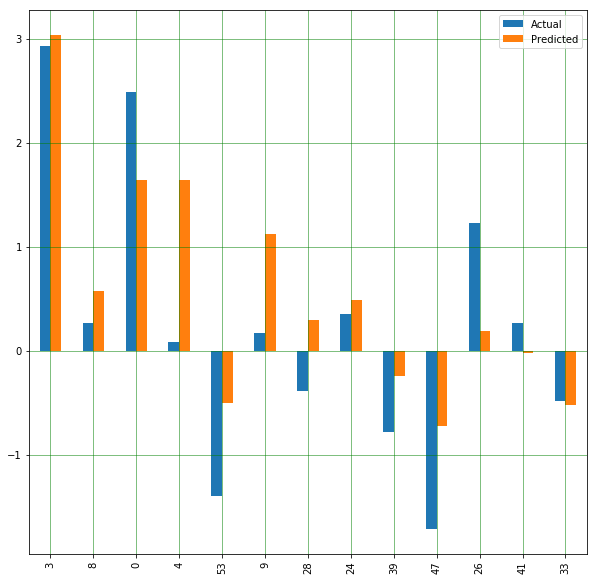

Mean Absolute Error: 0.6436197876853694
Mean Squared Error: 0.6043635681760322
Root Mean Squared Error: 0.7774082377850342


model for 9 evaluation parameter
Variance score: 0.7581400367647455
The linear model is: Y = 0.036106 + -1.0254*large b/p + -1.5016*large ROE + -0.91456*large s/p+ -1.021*large return rates+ -1.6006*large market sales+ -1.3735*small system risk


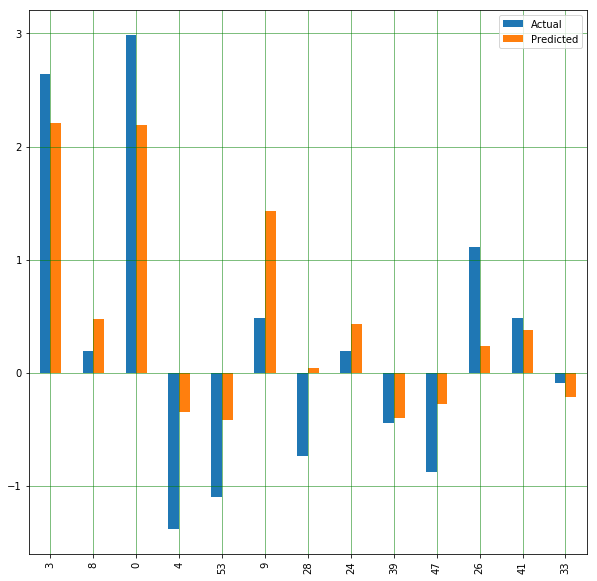

Mean Absolute Error: 0.5342730595319526
Mean Squared Error: 0.39697312589070183
Root Mean Squared Error: 0.6300580337482428


model for 10 evaluation parameter
Variance score: -0.5080643353694467
The linear model is: Y = -0.028845 + 1.6424*large b/p + 1.5467*large ROE + 1.2793*large s/p+ 1.1144*large return rates+ 1.2215*large market sales+ 0.91788*small system risk


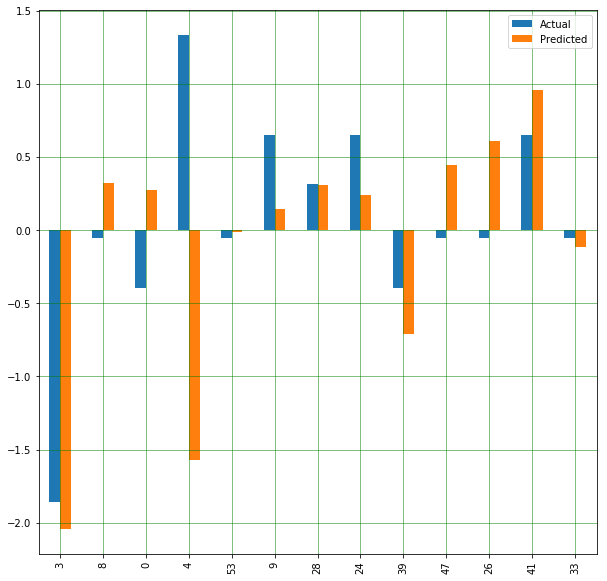

Mean Absolute Error: 0.5348797274323404
Mean Squared Error: 0.8003519075071641
Root Mean Squared Error: 0.8946238916478612


model for 11 evaluation parameter
Variance score: 0.5938605846551369
The linear model is: Y = -0.030646 + 1.0537*large b/p + 1.8436*large ROE + 1.253*large s/p+ 0.89425*large return rates+ 1.2194*large market sales+ 0.96981*small system risk


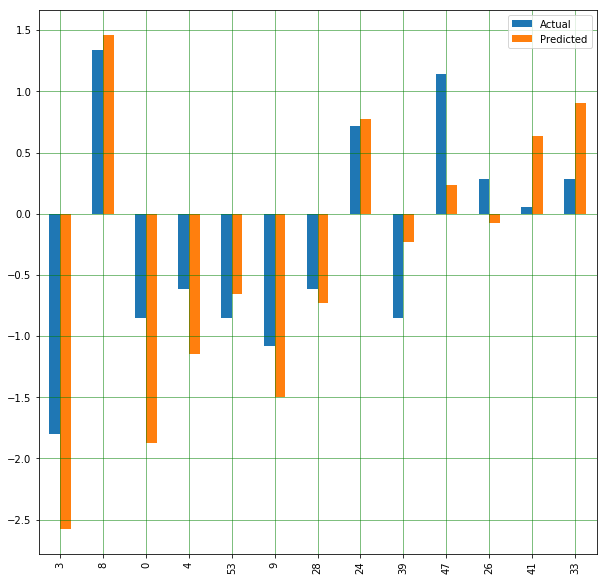

Mean Absolute Error: 0.4883590015084351
Mean Squared Error: 0.3271193780528897
Root Mean Squared Error: 0.5719435094945039


In [114]:
Y_pred=pd.DataFrame(columns=[6,7,8,9,10,11])
error=pd.DataFrame(columns=[6,7,8,9,10,11,12])
for y in y_train.keys():
    reg = linear_model.LinearRegression() 
    reg.fit(x_train, y_train[y])
    print("\n")
    print("model for",y,'evaluation parameter')
    print('Variance score: {}'.format(reg.score(x_test, y_test[y]))) 
    print("The linear model is: Y = {:.5} + {:.5}*large b/p + {:.5}*large ROE + {:.5}*large s/p+ {:.5}*large return rates+ {:.5}*large market sales+ {:.5}*small system risk".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2],reg.coef_[3],reg.coef_[4],reg.coef_[5]))
    y_pred = reg.predict(x_test)
    Y_pred[y]= y_pred
    error[y]=np.subtract(y_pred,y_test[y])
    df_pred = pd.DataFrame({'Actual': y_test[y], 'Predicted': y_pred})
    df_pred.plot(kind='bar',figsize=(10,10))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test[y], y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test[y], y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test[y], y_pred)))



model for 6 evaluation parameter
Variance score: 0.8300334612475024
The linear model is: Y = -0.011383 + 1.4626*large b/p + 1.7414*large ROE + 1.7161*large s/p+ 1.1456*large return rates+ 0.88624*large market sales+ 1.0554*small system risk


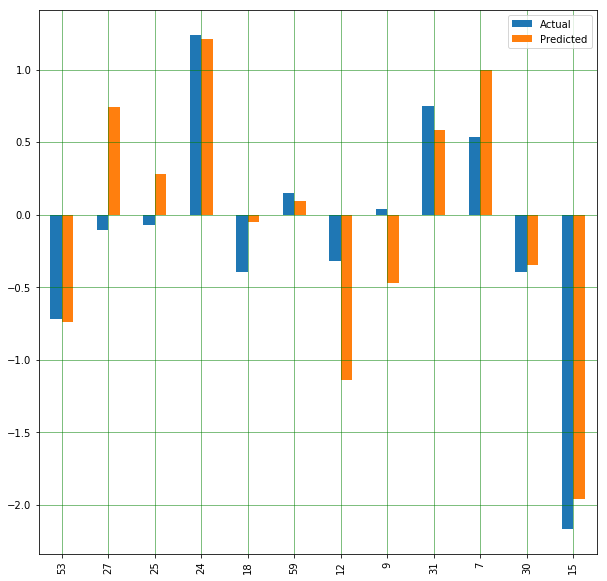

Mean Absolute Error: 0.31967810163980176
Mean Squared Error: 0.18086374157918927
Root Mean Squared Error: 0.42528077969641337


model for 7 evaluation parameter
Variance score: 0.7938556082150542
The linear model is: Y = -0.027119 + 1.7309*large b/p + 1.944*large ROE + 1.8698*large s/p+ 1.33*large return rates+ 1.1102*large market sales+ 1.3973*small system risk


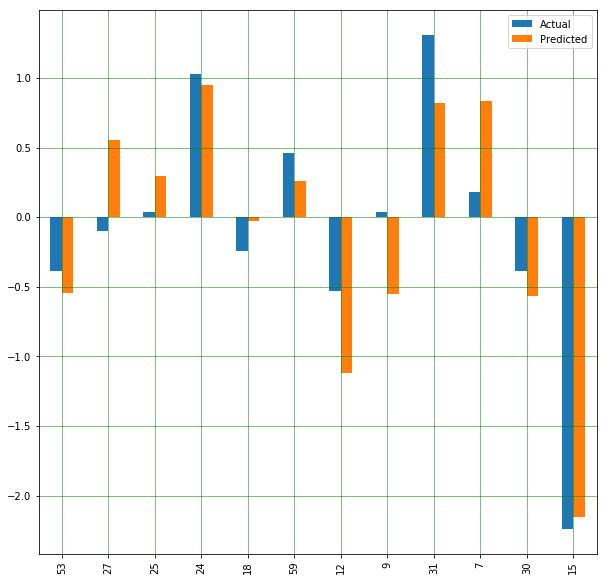

Mean Absolute Error: 0.3474039358462942
Mean Squared Error: 0.16879907099882854
Root Mean Squared Error: 0.41085164110519085


model for 8 evaluation parameter
Variance score: 0.6203094227391337
The linear model is: Y = 0.049347 + -1.6621*large b/p + -1.7406*large ROE + -1.3206*large s/p+ -1.3035*large return rates+ -1.5727*large market sales+ -1.8244*small system risk


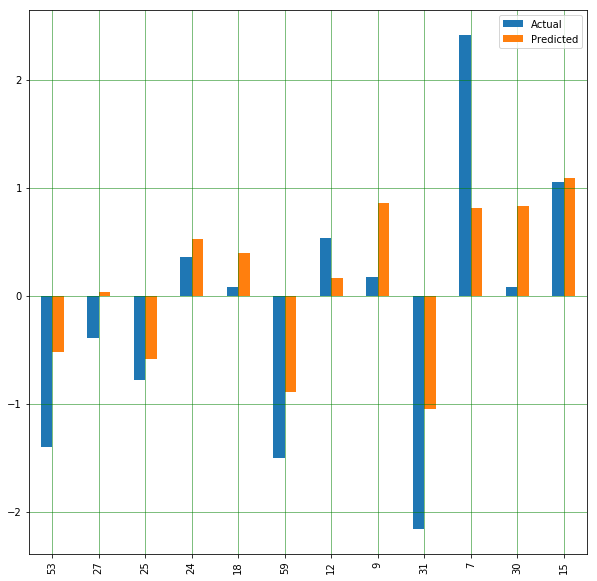

Mean Absolute Error: 0.5960038701212467
Mean Squared Error: 0.5381652158151778
Root Mean Squared Error: 0.7335974480702464


model for 9 evaluation parameter
Variance score: 0.7230130061725459
The linear model is: Y = 0.018566 + -0.95131*large b/p + -1.3296*large ROE + -0.75533*large s/p+ -0.90434*large return rates+ -1.4246*large market sales+ -1.1586*small system risk


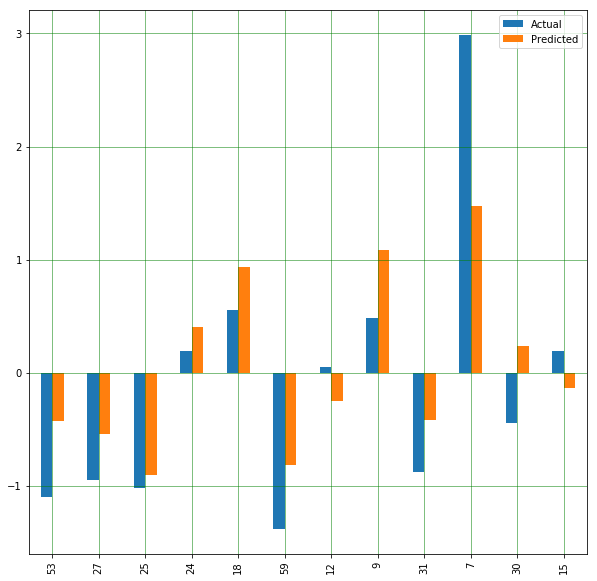

Mean Absolute Error: 0.5218903218613079
Mean Squared Error: 0.38990183216149327
Root Mean Squared Error: 0.6244211977195308


model for 10 evaluation parameter
Variance score: -0.39978079091916735
The linear model is: Y = -0.023599 + 1.1888*large b/p + 1.0751*large ROE + 0.91112*large s/p+ 0.61492*large return rates+ 0.73812*large market sales+ 0.49053*small system risk


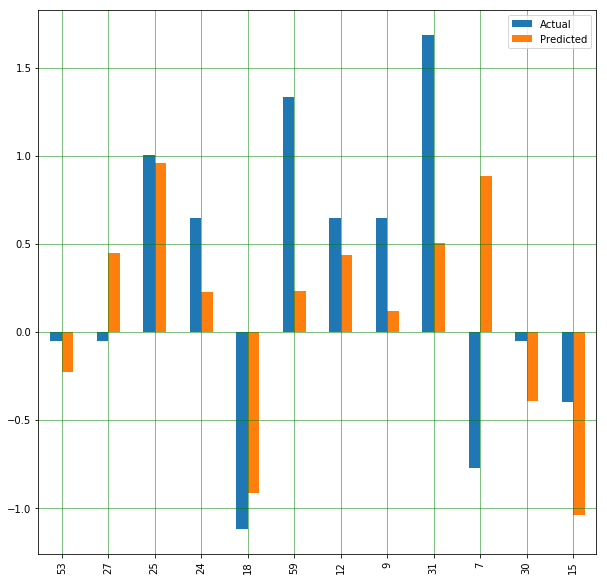

Mean Absolute Error: 0.5840010021857637
Mean Squared Error: 0.5583008856867975
Root Mean Squared Error: 0.7471953464033334


model for 11 evaluation parameter
Variance score: 0.6598530786478979
The linear model is: Y = -0.038868 + 1.0658*large b/p + 1.8637*large ROE + 1.1714*large s/p+ 0.8375*large return rates+ 1.1462*large market sales+ 0.88836*small system risk


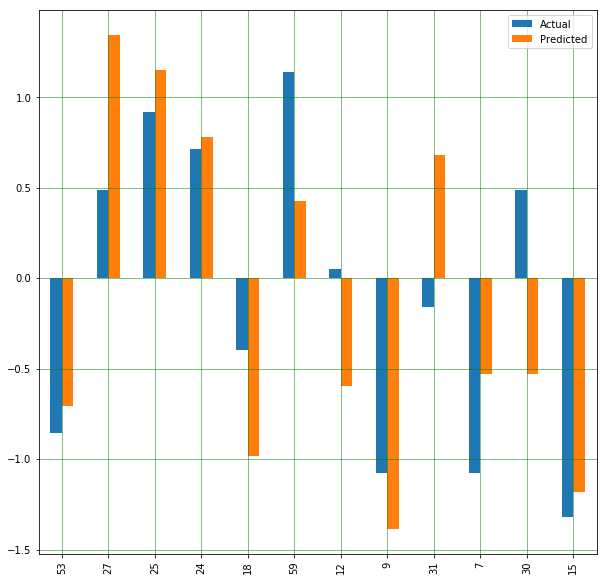

Mean Absolute Error: 0.5085964509878841
Mean Squared Error: 0.35352525773487314
Root Mean Squared Error: 0.5945799002109583


In [115]:
Y_o_pred=pd.DataFrame(columns=[6,7,8,9,10,11,12])
for y in y_o_train.keys():
    reg = linear_model.LinearRegression() 
    reg.fit(x_o_train, y_o_train[y])
    print("\n")
    print("model for",y,'evaluation parameter')  
    print('Variance score: {}'.format(reg.score(x_test, y_test[y]))) 
    print("The linear model is: Y = {:.5} + {:.5}*large b/p + {:.5}*large ROE + {:.5}*large s/p+ {:.5}*large return rates+ {:.5}*large market sales+ {:.5}*small system risk".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2],reg.coef_[3],reg.coef_[4],reg.coef_[5]))
    y_o_pred = reg.predict(x_o_test)
    Y_o_pred[y]= y_o_pred
    df_pred = pd.DataFrame({'Actual': y_o_test[y], 'Predicted': y_o_pred})
    df_pred.plot(kind='bar',figsize=(10,10))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_o_test[y], y_o_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_o_test[y], y_o_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_o_test[y], y_o_pred)))

In [116]:
for y in Y_o_pred.keys():
    for x in x_o.k

SyntaxError: unexpected EOF while parsing (<ipython-input-116-25edb200c028>, line 1)